In [ ]:
import sys
sys.path.append("XXXX")
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from models import VariationalAE
np.random.seed(2022)
torch.manual_seed(2022)

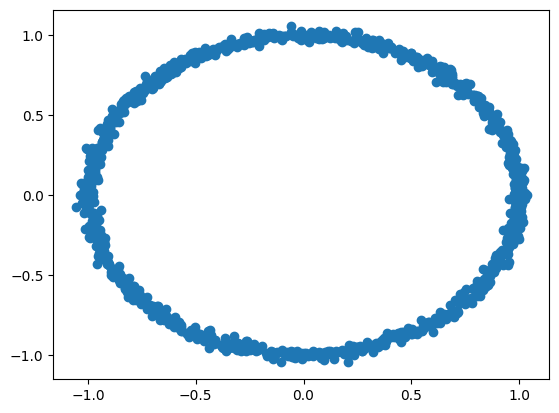

In [2]:
data, _ = make_circles(n_samples=1000, noise=0.02, factor=0.999)
plt.scatter(data[:, 0], data[:, 1])
plt.show()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = TensorDataset(torch.from_numpy(data).float(), torch.zeros(data.shape[0]))
dataloader = DataLoader(dataset, shuffle=True, batch_size=100)


In [ ]:
vae = VariationalAE(device=device)
optim = torch.optim.Adam(params=vae.parameters(), lr=0.01)

kld_weight = .1

In [ ]:
for epoch in range(2000):
    epoch_loss = 0.
    for x,_ in dataloader:
        mu, log_var, z, x_ = vae(x)
        loss, loss_record = vae.loss_function(x, mu, log_var, x_, kld_weight)
        optim.zero_grad()
        loss.backward()
        optim.step()
        print(f"epoch {epoch} loss {loss.item()} recnst {loss_record['recon']} kl {loss_record['KLD']}")

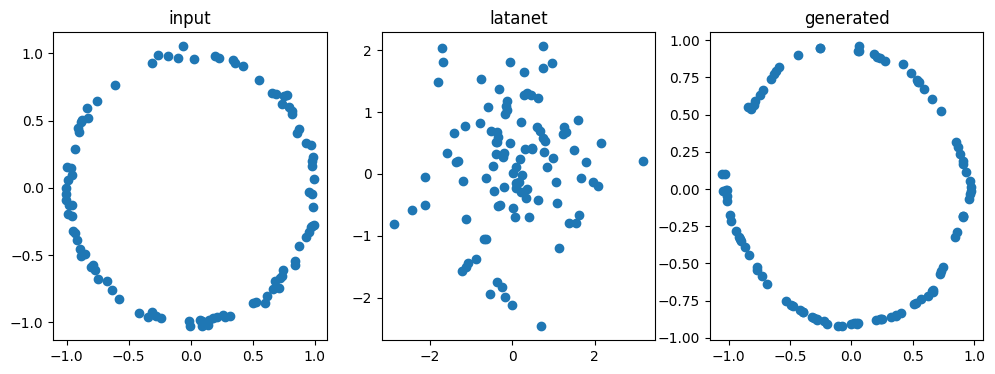

In [21]:
# x = x.detach().numpy()
# x_ = x_.detach().numpy()
# z = z.detach().numpy()
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(x[:, 0], x[:, 1])
ax[0].set_title('input')
ax[1].scatter(z[:, 0], z[:, 1])
ax[1].set_title('latanet')
ax[2].scatter(x_[:, 0], x_[:, 1])
ax[2].set_title('generated')
plt.show()
plt.close()